# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df=pd.read_csv(r"C:\Users\Tanush Sujoy\Downloads\Lab 4 - Unsu[ervised learinng\marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.shape

(2240, 27)

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
percentage_missing_values=df.isnull().sum()/len(df)*100
percentage_missing_values

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df.dropna(inplace=True)  # Drops rows with missing values

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [8]:
df.drop(['ID','Dt_Customer'],axis=1,inplace=True)

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:

df['Marital_Status'].replace(['Married', 'Together'], 'relationship', inplace=True)

### ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [12]:
df['Marital_Status'].replace(['Divorced', 'Widow','Alone','YOLO','Absurd'], 'Single', inplace=True)

In [13]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [15]:
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2216, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [16]:
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)


In [17]:
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2216, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [18]:
df['Kids']=df[['Kidhome','Teenhome']].sum(axis=1)

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [19]:
df['TotalAcceptedCmp']=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

### 11. Drop those columns which we have used above for obtaining new features

In [20]:
#dropping the merged columns
df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
         'MntGoldProds','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2',
         'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1,inplace=True)

In [21]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


In [22]:
df_cleaned=df.copy()

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [23]:
df['Age']=2023-df['Year_Birth']
df['Age'].head()

0    66
1    69
2    58
3    39
4    42
Name: Age, dtype: int64

### 13. Encode the categorical variables in the dataset

In [24]:
categorical_variables=df.select_dtypes(include='object')
categorical_variables

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,relationship
3,Graduation,relationship
4,PhD,relationship
...,...,...
2235,Graduation,relationship
2236,PhD,relationship
2237,Graduation,Single
2238,Master,relationship


In [25]:
df_cate=['Education','Marital_Status']
le=LabelEncoder()
for i in df_cate:
    df[i]=df[[i]].apply(le.fit_transform)

In [26]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,1957,2,0,58138.0,58,7,0,1617,25,0,1,66
1,1954,2,0,46344.0,38,5,0,27,6,2,0,69
2,1965,2,1,71613.0,26,4,0,776,21,0,0,58
3,1984,2,1,26646.0,26,6,0,53,8,1,0,39
4,1981,4,1,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [27]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [28]:
scaled_features_df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.986443,-0.350527,-1.348829,0.234063,0.310532,0.693232,-0.097812,1.675488,1.319446,-1.264803,0.618045,0.986443
1,-1.236801,-0.350527,-1.348829,-0.234559,-0.380509,-0.131574,-0.097812,-0.962358,-1.157987,1.405806,-0.502731,1.236801
2,-0.318822,-0.350527,0.741384,0.769478,-0.795134,-0.543978,-0.097812,0.280250,0.797881,-1.264803,-0.502731,0.318822
3,1.266777,-0.350527,0.741384,-1.017239,-0.795134,0.280829,-0.097812,-0.919224,-0.897205,0.070501,-0.502731,-1.266777
4,1.016420,1.429011,0.741384,0.240221,1.554407,-0.131574,-0.097812,-0.307044,0.537099,0.070501,-0.502731,-1.016420


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [29]:
#1.calaculate covariance matrix
cov_matrix=np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00045147 -0.17114208  0.00203431 -0.16186447 -0.01630226  0.12395988
  -0.03042097 -0.11353807 -0.17013154 -0.08743788  0.00774963 -1.00045147]
 [-0.17114208  1.00045147 -0.01457021  0.12074685 -0.01142336 -0.04084005
  -0.05088592  0.09411169  0.09113856  0.0547618   0.06501622  0.17114208]
 [ 0.00203431 -0.01457021  1.00045147  0.0046655  -0.00137167  0.00302309
  -0.00537107 -0.01935619  0.0059506   0.04221371 -0.05968763 -0.00203431]
 [-0.16186447  0.12074685  0.0046655   1.00045147 -0.00397155 -0.55333771
  -0.0272368   0.66787748  0.56712852 -0.29348436  0.28811379  0.16186447]
 [-0.01630226 -0.01142336 -0.00137167 -0.00397155  1.00045147 -0.01857202
   0.01364283  0.02007471  0.00752238  0.01829834 -0.09043257  0.01630226]
 [ 0.12395988 -0.04084005  0.00302309 -0.55333771 -0.01857202  1.00045147
   0.01979394 -0.49930729 -0.31406729  0.41626432 -0.12690041 -0.12395988]
 [-0.03042097 -0.05088592 -0.00537107 -0.0272368   0.01364283  0.01979394
   1.0004514

In [31]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-1.86237736e-01  6.43154322e-01 -7.07106781e-01  4.99309408e-03
   2.05575684e-02 -3.80945139e-02  1.09748076e-01  8.84263734e-02
  -1.51094792e-01 -2.24668122e-02 -7.48099896e-02  3.12169035e-02]
 [ 9.75313586e-02 -1.90328410e-01  5.21034546e-16  1.64033864e-02
   2.24556342e-02  1.30577060e-01 -2.06817254e-01  4.98028740e-01
  -5.62468676e-01 -4.43018012e-01 -2.93838975e-01  2.15999353e-01]
 [-1.60391218e-02 -1.76878372e-02  1.57873378e-16 -2.29311053e-04
   2.83120805e-03  7.70103143e-03 -2.29222123e-01 -1.02516474e-01
  -1.61997262e-01  2.80007296e-01 -6.11837150e-01 -6.76253065e-01]
 [ 4.47502626e-01  4.85805501e-02 -3.73990525e-16  1.10073894e-01
  -7.40185374e-01 -3.71915265e-01  2.69676194e-01  1.15975541e-01
  -5.80215771e-02  5.44063861e-02 -7.82713710e-02 -2.10041550e-02]
 [-2.71751651e-03 -3.38580126e-02  3.26627974e-18  3.64182525e-02
  -1.60386150e-02 -5.92514473e-02 -2.12277705e-01 -2.66729018e-01
  -3.07400754e-01  6.10835531e-01 -1.90306122e-01  6.11

In [32]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [27.173625878376196, 16.95435583086293, 8.987641531958987, 8.555229197976525, 8.321258608650279, 7.827552220605105, 7.021995543646965, 6.257310663157551, 4.828638781132242, 2.754548041205977, 1.317843702427236, 2.078526314372823e-15]
Cummulative Variance Explained:  [ 27.17362588  44.12798171  53.11562324  61.67085244  69.99211105
  77.81966327  84.84165881  91.09896948  95.92760826  98.6821563
 100.         100.        ]


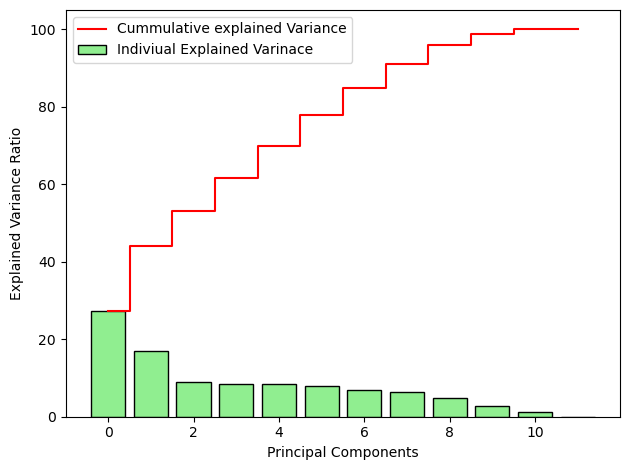

In [33]:
plt.bar(range(12),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(12), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

#### .We can see that approximately 95.0% of variance is explained by the first 8 variables.
#### . so, we can choose the optimal number of principal components as 8.

In [34]:
## Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [35]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.133979,0.495754,-0.272508,1.134592,-0.923828,-0.346690,1.240046,0.043293
1,-1.122596,2.128927,-0.379762,0.952450,-0.610319,-0.984737,-0.263449,0.470147
2,1.344016,-0.088333,0.370559,-0.298160,1.023448,-0.865689,-0.501284,0.116111
3,-2.062436,-1.387585,-0.160492,-0.405619,0.877252,-0.301099,-0.479475,-0.144419
4,-0.173742,-0.868400,0.683162,-1.547321,-0.867340,1.629402,-0.641643,-0.012977


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [36]:
cluster_range = range(1,12)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=8)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,24225.037963
1,2,18806.420424
2,3,16854.732241
3,4,14729.454687
4,5,13513.053284
5,6,12577.418388
6,7,11831.060148
7,8,11255.817429
8,9,10736.705947
9,10,10269.334832


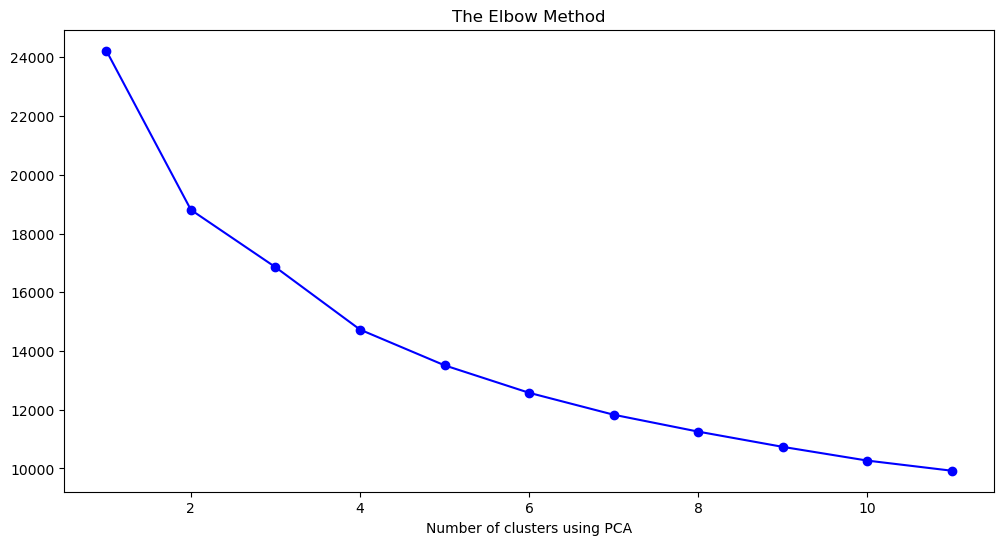

In [37]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

### From the Elbow plot, we can see that at K=3 the interia starts to drop significantly. So we will do it using 6 clusters.

In [38]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=100)

In [39]:
## obtained labels from kmeans clustering
kmeans.labels_

array([2, 0, 2, ..., 2, 0, 0])

In [41]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,2
1,0
2,2
3,1
4,1


In [42]:
kmeans_df=data_pca.join(df_labels)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,2.133979,0.495754,-0.272508,1.134592,-0.923828,-0.346690,1.240046,0.043293,2
1,-1.122596,2.128927,-0.379762,0.952450,-0.610319,-0.984737,-0.263449,0.470147,0
2,1.344016,-0.088333,0.370559,-0.298160,1.023448,-0.865689,-0.501284,0.116111,2
3,-2.062436,-1.387585,-0.160492,-0.405619,0.877252,-0.301099,-0.479475,-0.144419,1
4,-0.173742,-0.868400,0.683162,-1.547321,-0.867340,1.629402,-0.641643,-0.012977,1


In [43]:
kmeans_df['Labels'].value_counts()

1    858
2    695
0    663
Name: Labels, dtype: int64

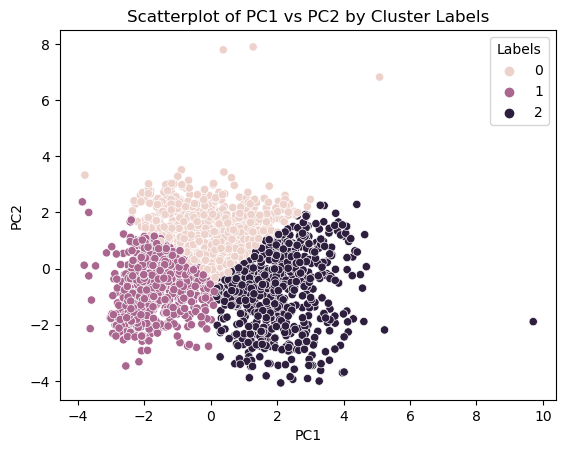

In [44]:
#visualising te clusters
sns.scatterplot(x=kmeans_df['PC1'], y=kmeans_df['PC2'], hue=kmeans_df['Labels'])
plt.title('Scatterplot of PC1 vs PC2 by Cluster Labels')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.2259456115339463
3 0.17524333613349893
4 0.17983092222912117
5 0.15778056813472616
6 0.16217455050281843
7 0.16082546857780053
8 0.16371523602204216
9 0.16997804896801066
10 0.15823409204325384
11 0.15721643323463708


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

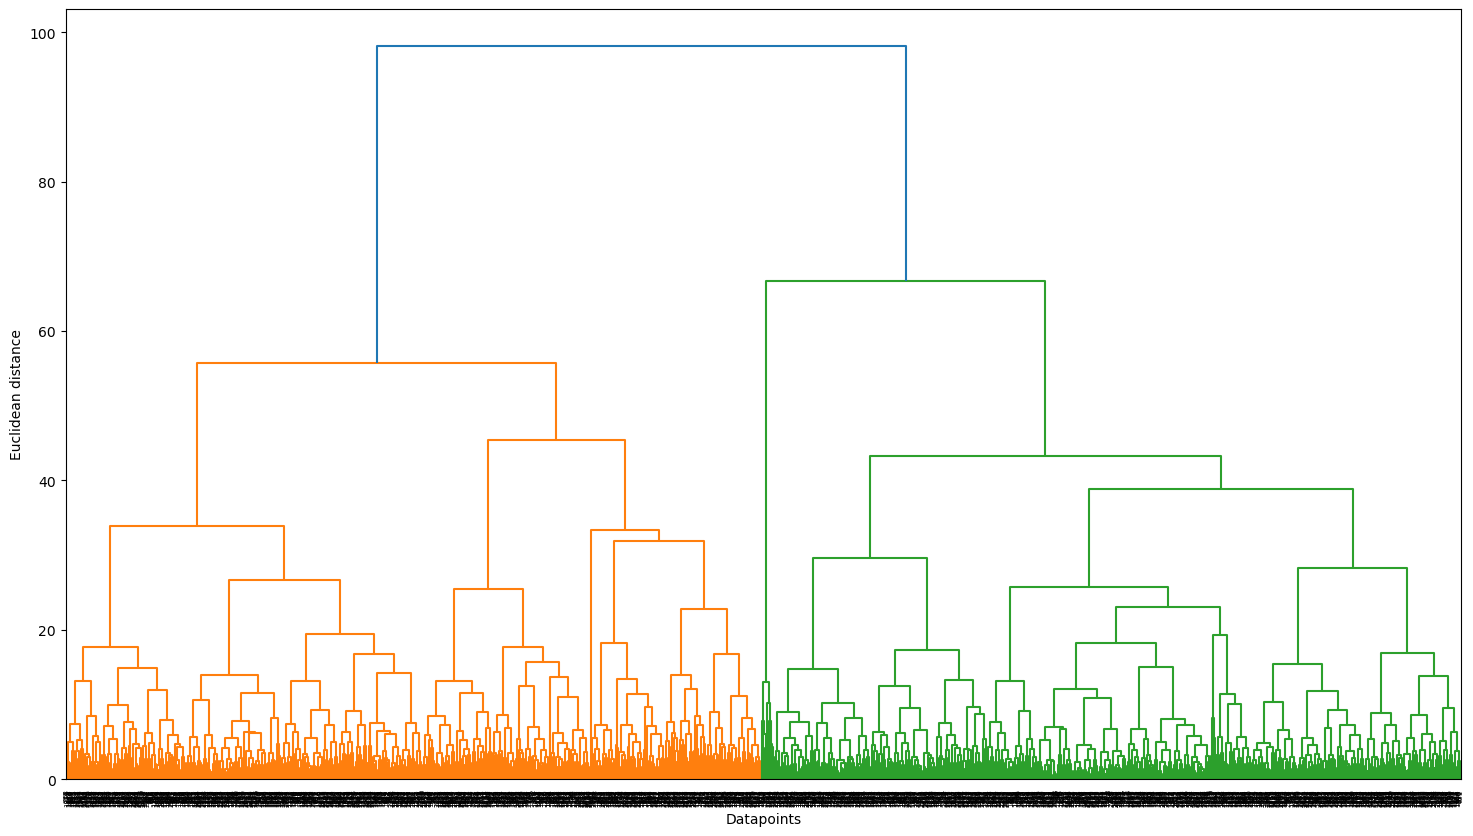

In [46]:
plt.figure(figsize=[18,10])
merg=linkage(scaled_features_df,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

### computing silhoutte score for agglomerative clustering

In [47]:
for i in range(2,12):
    hier =AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df)
    labels=hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))


2 0.18172270356648443
3 0.1900623390894673
4 0.12727259107864392
5 0.13161226331017997
6 0.11137846421363215
7 0.103569194554439
8 0.10701569583830198
9 0.10859640479714346
10 0.10833964307227907
11 0.09957845764107906


### Looking at the dendrogram and silhoutte scores we see that choosing 3 clusters gives the highest score.
### Choosing K=3 lets fit the agglomerative clustering model using scaled 

In [48]:
hie_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [49]:
#creating dataframe of lables
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,1


In [50]:
#joining the labels with orignal cleaned dataframe
df_hier=df_cleaned.join(df_label1)
df_hier.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Labels
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1,0.0
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0,1.0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0,0.0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0,1.0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0,1.0


### Visualization and Interpretation of results

-----
## Happy Learning
-----